In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
%matplotlib inline


In [17]:
df = pd.read_csv('C:/Data/Credit Risk Prediction/bankloans.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [18]:
df.shape

(1150, 9)

In [19]:
df.isnull().sum()


age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [20]:
df.value_counts()


age  ed  employ  address  income  debtinc  creddebt  othdebt    default
20   1   4       0        14      9.7      0.200984  1.157016   1.0        1
39   1   10      4        31      4.8      0.184512  1.303488   0.0        1
         0       8        39      7.9      1.066026  2.014974   0.0        1
         2       15       22      23.1     1.915914  3.166086   1.0        1
         4       9        38      6.5      1.178190  1.291810   0.0        1
                                                                          ..
30   2   8       4        56      6.4      0.333312  3.250688   0.0        1
         10      4        22      16.1     1.409716  2.132284   0.0        1
         12      9        68      20.1     2.856612  10.811388  0.0        1
                          98      7.2      2.935296  4.120704   0.0        1
56   1   11      20       59      15.0     4.672800  4.177200   0.0        1
Length: 700, dtype: int64

In [21]:
df = df.dropna()

In [22]:
df.value_counts()


age  ed  employ  address  income  debtinc  creddebt  othdebt    default
20   1   4       0        14      9.7      0.200984  1.157016   1.0        1
39   1   10      4        31      4.8      0.184512  1.303488   0.0        1
         0       8        39      7.9      1.066026  2.014974   0.0        1
         2       15       22      23.1     1.915914  3.166086   1.0        1
         4       9        38      6.5      1.178190  1.291810   0.0        1
                                                                          ..
30   2   8       4        56      6.4      0.333312  3.250688   0.0        1
         10      4        22      16.1     1.409716  2.132284   0.0        1
         12      9        68      20.1     2.856612  10.811388  0.0        1
                          98      7.2      2.935296  4.120704   0.0        1
56   1   11      20       59      15.0     4.672800  4.177200   0.0        1
Length: 700, dtype: int64

In [23]:
df.shape

(700, 9)

<AxesSubplot:xlabel='age', ylabel='income'>

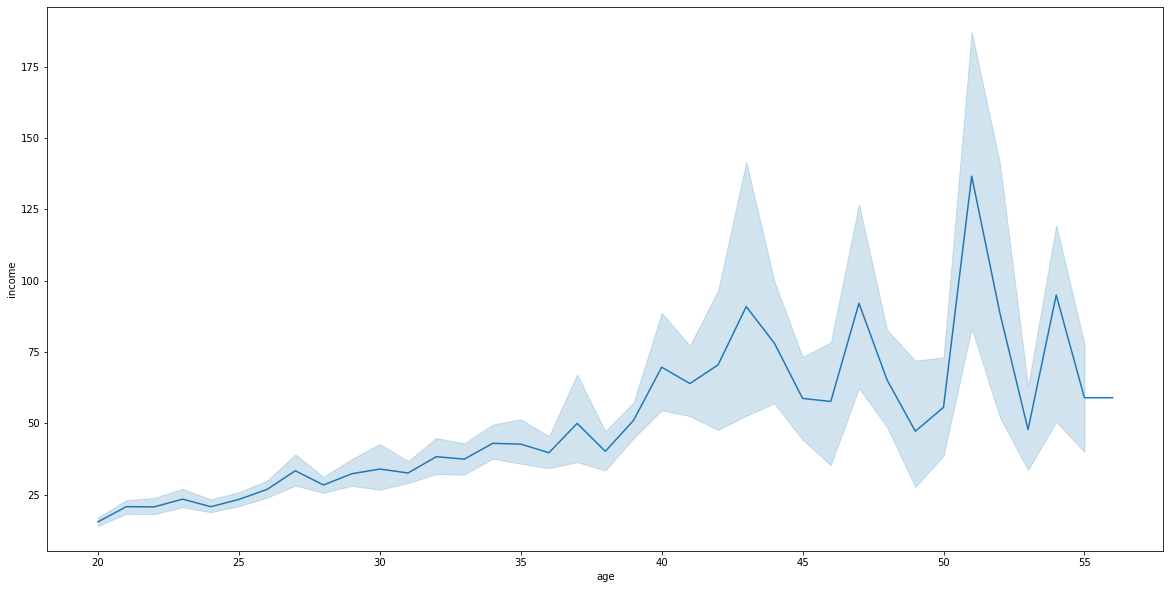

In [24]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='age',y='income',data=df,ax=ax)

<AxesSubplot:xlabel='age', ylabel='debtinc'>

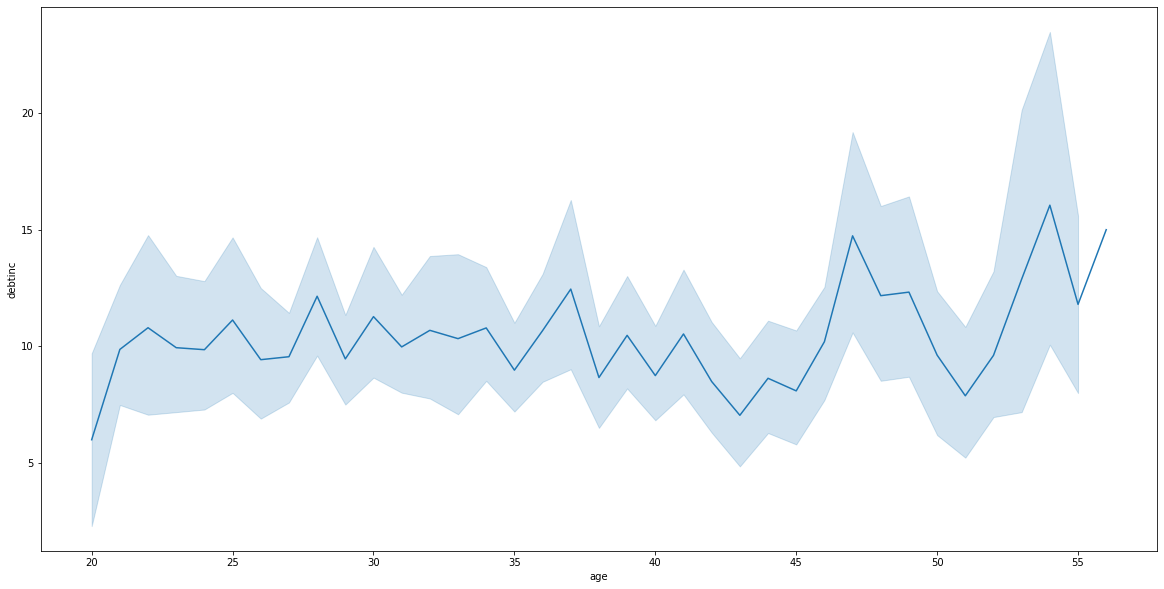

In [25]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='age',y='debtinc',data=df,ax=ax)

In [26]:
df['default'].value_counts()


0.0    517
1.0    183
Name: default, dtype: int64

In [27]:
x=df.drop(['default'],axis=1)
y=df['default']

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)


In [29]:
sc = StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

### Creating Model

### Random Forest

In [30]:
rfc = RandomForestClassifier(n_estimators=200)


In [31]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [32]:
rfc.score(xtest,ytest)


0.8142857142857143

In [33]:
rfc2 = cross_val_score(estimator=rfc,X=xtrain,y=ytrain,cv=10)
rfc2.mean()

0.7839285714285714

#### SVM

In [34]:
sv = SVC()
sv.fit(xtrain,ytrain)

SVC()

In [35]:
sv.score(xtest,ytest)


0.7928571428571428

In [36]:
# Now SVM with Optimal Parameter

In [37]:
model = GridSearchCV(sv,{
    'C':[0.1,0.2,0.4,0.8,1.2,1.8,4.0,7.0],
    'gamma':[0.1,0.4,0.8,1.0,2.0,3.0],
    'kernel':['rbf','linear']
},scoring='accuracy',cv=10)

In [38]:
model.fit(xtrain,ytrain)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [39]:
model.best_params_


{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [40]:
model2 = SVC(C=0.1,gamma=0.1,kernel='linear')
model2.fit(xtrain,ytrain)
model2.score(xtest,ytest)

0.8214285714285714

#### Logistic Regression

In [41]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

0.8357142857142857

<AxesSubplot:>

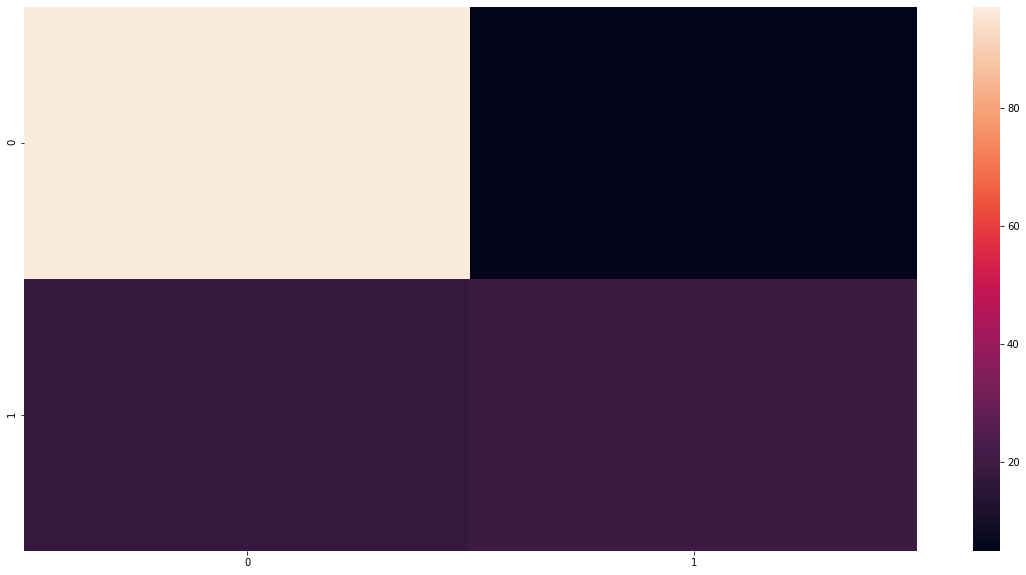

In [49]:
yp = lr.predict(xtest)
c= confusion_matrix(ytest,yp)
fig ,ax = plt.subplots(figsize=(20,10))
sns.heatmap(c,ax=ax)

## Model Evaluation & Prediction

In [50]:
# prediction on training data
training_data_prediction =lr.predict(xtrain)

In [52]:
# prediction on test data
test_data_prediction =lr.predict(xtest)

In [57]:
input_data = (20,1,4,0,14,9.7,0.200984,1.157016)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)
print(prediction)

print('The Person Will Be defaulter ', prediction[0])


[0.]
The Person Will Be defaulter  0.0


In [58]:
input_data = (39,1,10,4,31,4.8,0.184512,1.303488 )

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)
print(prediction)

print('The Person Will Be defaulter', prediction[0])


[0.]
The Person Will Be defaulter 0.0
